# Lecture 1.2 Activity: The Best Model? You Bet!

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.2, Monday, Sep 9, 2024. This assignment does not need to be turned in.*

## Overview

In this assignment we will fit two models to observations of ice break-up date and reflect on their performance.

The data we are working with represents the number of days since the new year that it took for the ice in a river to completely melt and break apart. The record goes from 1917 to 2019, which is in total 103 years of measurements.

**Goal of the assignment:** reflect on model performance and model accuracy in the context of its use.

We will follow these steps:

1. Import data using `numpy`;
2. Explore the data;
3. Fit a linear regression model and reflect on its goodness of fit;
5. Apply confidence intervals to the model;
6. Fit a non-linear model and reflect on its goodness of fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
import scipy.optimize as opt

## Part 1: Import data

We will import the dataset by using the `numpy` function `loadtxt`. If you open the *data-days.csv* file, you will notice that the comma is used as decimal separator for the number of recorded days. For this reason, we will import the data in the following steps:

1. Read the file `data-days.csv` as strings. To this end, we will use the option `dtype=str` within the function `loadtxt`. Note that we also need to set the delimiter between columns as `delimeter=;` and specify to skip the first row (which contains the header of the columns) as `skiprows=1`.
    
2. Replace the commas by dots. We will use the `numpy` function `char.replace` to this end. The first argument is the numpy array of strings where we want to make changes, the second argument is the character we want to look for and change, and the third argument is what we want to use as replacement.
   
3. Transform it back to `float` data. We will use `data.astype(float)` for this.

And our data is ready to start playing!

We also printed for you the first 10 elements of the array, so you can see how it actually looks.

In [2]:
data = np.loadtxt('data/days.csv', dtype=str, delimiter=';', skiprows=1)
data = np.char.replace(data, ',', '.')
data = data.astype(float)

data[0:10]

array([[1917.       ,  119.4791667],
       [1918.       ,  130.3979167],
       [1919.       ,  122.60625  ],
       [1920.       ,  131.4486111],
       [1921.       ,  130.2791667],
       [1922.       ,  131.5555556],
       [1923.       ,  128.0833333],
       [1924.       ,  131.6319444],
       [1925.       ,  126.7722222],
       [1926.       ,  115.66875  ]])

## Part 2: Preliminary Analysis

One of the first steps when getting familiar with new data is to see the dimensions of the data. To this end, we can use the `numpy` function `shape`.

In [3]:
np.shape(data)

(103, 2)

The result is a (103, 2) array, i.e., a matrix with 103 rows and 2 columns. The first column contains the year of record, while the second one contains the measured data.

We can also compute the mean and the standard deviation of the variable of interest (second column) to get a sense of how the variable behaves.

In [4]:
mean = np.mean(data[:,1])
std = np.std(data[:,1])

print(f'Mean: {mean:.3f}\n\
Standard deviation: {std:.3f}')

Mean: 123.647
Standard deviation: 6.516


We can also quickly plot them to see the scatter of the data and the evolution in time.

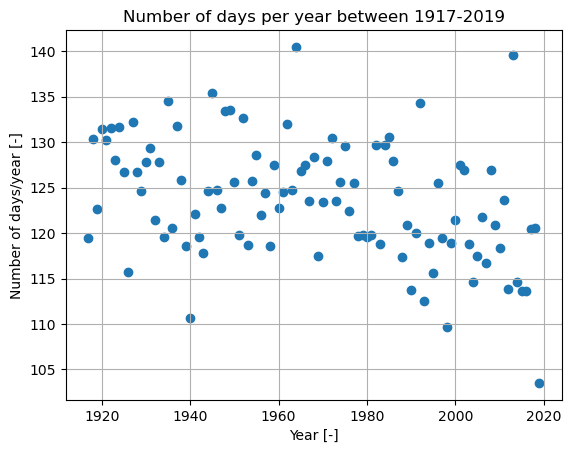

In [5]:
plt.scatter(data[:, 0], data[:, 1], label='Measured data')
plt.xlabel('Year [-]')
plt.ylabel('Number of days/year [-]')
plt.title(f'Number of days per year between {data[0,0]:.0f}-{data[-1,0]:.0f}')
plt.grid()

In the figure above, we have plotted the year of the measurement in the x-axis and the number of days until the ice broke during that year in the y-axis. We can see that there is a significant scatter. Also, there seems to be a trend over time: as we go ahead in time (higher values in the x-axis), the number of days until the ice broke seems to decrease.

We have identifid a trend but **can we model it**?

## Part 3: Fit a linear regression model: is it a good model?

We are going to create a model which allows us to predict the number of days until the ice broke as function of the year. For that, we are going to assume a linear relationship between the variables (a linear model) and we will fit it using linear regression. This is, we will fit a regression model $days=m\cdot year+q$, where $m$ represents the slope of the line, and $q$ is the intercept.

We will do it using functions which were already coded for us. We will use the `scipy.stats` library which contains the `linregress` function. For more info see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

In the next code block we define the function `regression` which requires x and y values as input and computes the values of $R^2$, $m$, and $q$. 

Remember that $R^2$ is a goodness of fit metric and you should have read about it [here](https://mude.citg.tudelft.nl/2024/book/modelling/gof.html).

In [6]:
def regression(x, y):
    '''
    Determine linear regression

    Input: x = array, x values
           y = array, y values

    Output: r_sq = coefficient of determination
            q = intercept of the line
            m = slope of the line
    '''

    regression = sci.linregress(x, y)
    r_sq = regression.rvalue**2
    q = regression.intercept 
    m = regression.slope 

    print(f'Coefficient of determination R^2 = {r_sq:.3f}')
    print(f'Intercept q = {q:.3f} \nSlope m = {m:.3f}')

    return r_sq, q, m


In [7]:
r_sq, q, m = regression(data[:,0], data[:,1])

Coefficient of determination R^2 = 0.151
Intercept q = 291.239 
Slope m = -0.085


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b> Based on the obtained coefficient of determination, assess the performance of the model.
<ol>
    <li> What does the coefficient of determination mean in this context?</li>
    <li> Is the developed model accurate? </li>

</ol>
</p>
</div>

We can also plot the data and the fitted model to see how the fit looks. To do so, we can make computations using the previous equation $days=m\cdot year+q$ with the fitted intercept $q$ and slope $m$. We have already defined a function which does it for you.

In [8]:
def calculate_line(x, m, q):
    '''
    Determine y values from linear regression

    Input: x = array
           m = slope of the line
           q = intercept of the line

    Output: y = array
    '''

    y = m * x + q

    return y

In [9]:
line = calculate_line(data[:,0], m, q)

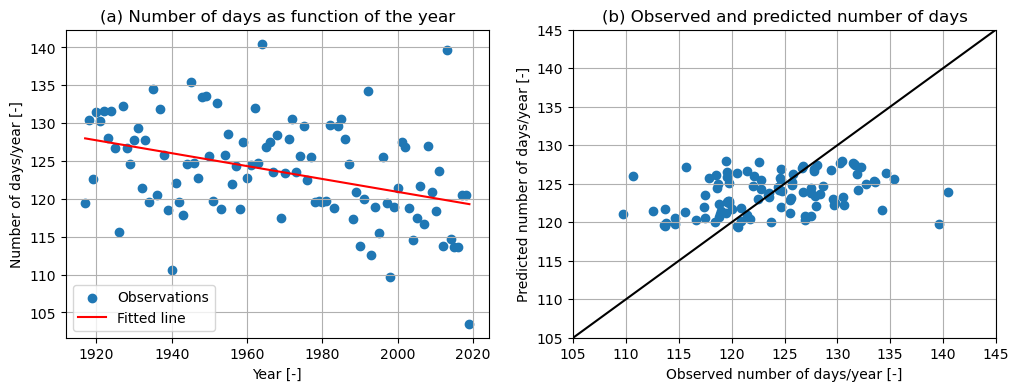

In [10]:
fig, axes = plt.subplots(1, 2,figsize = (12, 4))

axes[0].scatter(data[:,0], data[:,1], label = 'Observations')
axes[0].plot(data[:,0], line, color='r', label='Fitted line')
axes[0].set_ylabel('Number of days/year [-]')
axes[0].set_xlabel('Year [-]')
axes[0].grid()
axes[0].legend()
axes[0].set_title('(a) Number of days as function of the year')

axes[1].scatter(data[:,1], line)
axes[1].plot([105, 145],[105, 145], line, color = 'k')
axes[1].set_xlim([105, 145])
axes[1].set_ylim([105, 145])
axes[1].set_ylabel('Predicted number of days/year [-]')
axes[1].set_xlabel('Observed number of days/year [-]')
axes[1].grid()
axes[1].set_title('(b) Observed and predicted number of days');

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>   
    <p>Interpret the figures above. Do the previous plots fit with the result given by the coefficient of determination? Are they aligned?</p>
<ol>

</ol>
</p>
</div>

We can also assess the scatter using the Root Mean Square Error ($RMSE$). Don't you remember it? Go back to the [book](https://mude.citg.tudelft.nl/2024/book/modelling/gof.html)!

Let's see how our model performs for this metric.

In [11]:
def RMSE(data, fit_data):
    '''
    Compute the RMSE

    RMSE = [sum{(data - fit_data)^2} / N]^(1/2)

    Input: data = array with real measured data
           fit_data = array with predicted data
    
    Output: RMSE
    '''

    diff_n = (data - fit_data)**2
    mean = np.mean(diff_n)

    error = mean**(1/2)
    print(f'RMSE = {error:.3f}')
    return error

In [12]:
RMSE_line = RMSE(data[:,1], line)

RMSE = 6.003


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.3:</b>   
    Based on the obtained RMSE, assess the performance of the model. Answer in the cell below using markdown:
<ol>
    <li> What does RMSE mean in this context?</li>
    <li> Is the developed model accurate according to RMSE? </li>

</ol>
</p>
</div>

Finally, we can compute the bias of our model using $rbias$.

In [13]:
def rbias(data, fit_data):
    '''
    Compute the relative bias

    rbias = [sum{(fit_data-data) / |data|}]/N

    Input: data = array with real measured data
           fit_data = array with predicted data
    
    Output: relative bias
    '''
    bias = np.mean((fit_data-data)/data)

    print(f'rbias = {bias:.3f}')
    return bias

In [14]:
rbias_line = rbias(data[:,1], line)

rbias = 0.002


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.4:</b>   
    Based on the obtained relative bias, assess the performance of the model. Answer in the cell below using markdown:
<ol>
    <li> What does <code>rbias</code> mean in this context?</li>
</ol>
</p>
</div>

## Part 4: Confidence Intervals

One way of assessing the uncertainty around the predictions of a model are confidence intervals. They give us insight into the precision of their predictions by transforming them into probabilities. In short, the 95% confidence interval (significance $\alpha=0.05$) shows the range of values within which my observation would be with a probability of 95%. Here, we want you to focus on their interpretation. In the following weeks (1.3), you will learn more about how to compute them. 

In [15]:
def conf_int(x, y, alpha):
    '''
    Compute the confidence intervals

    Input: x = array, observations
           y = array, predictions
           alpha = float, confidence interval

    Output: k = float, width of the confidence interval
    '''
    sd_error = (y - x).std()
    k = sci.norm.ppf(1-alpha/2)*sd_error

    return k

Text(0.5, 1.0, 'Number of days as function of the year')

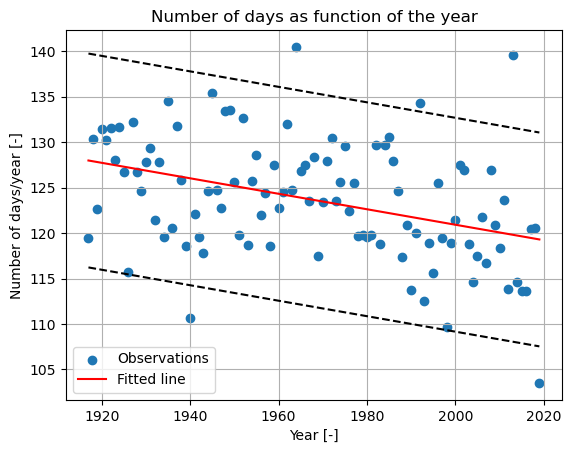

In [16]:
k = conf_int(data[:,1], line, 0.05)
ci_low = line - k
ci_up = line + k

#plot
plt.scatter(data[:,0], data[:,1], label = 'Observations')
plt.plot(data[:,0], line, color='r', label='Fitted line')
plt.plot(data[:,0], ci_low, '--k')
plt.plot(data[:,0], ci_up, '--k')
plt.ylabel('Number of days/year [-]')
plt.xlabel('Year [-]')
plt.grid()
plt.legend()
plt.title('Number of days as function of the year')

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.1:</b>   
    What can you conclude from the previous plot? Think about the accuracy of the prediction compared to the precision you need in your bet (up to minutes!).
<ol>
</ol>
</p>
</div>

## Part 5: Non-linear Models

As we have seen, the data-driven linear model is not really a good choice for representing the data we have. Let's try with one which is slightly more complicated: a non-linear model.

In this section, we will analyze the fitting of a quadratic model as $days = A \cdot year^2 + B \cdot year + C$. The steps are the same as in the previous section, so we will go fast through the code to focus on the interpretation and comparison between the two models.

You do not need to worry about this right now, but in case you are curious: we will make use of the `scipy.optimize` library, which contains the `curve_fit` function. For further info on the function see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [17]:
def parabola(x, a, b, c):
    '''
    Compute the quadratic model

    y = a * x^2 + b * x + c

    Input: x = array, independent variable
           a, b, c = parameters to be optimized

    Output: y = array, dependent variable
    '''

    y = a * x**2 + b * x + c
    return y

In [18]:
popt_parabola, pcov_parabola = opt.curve_fit(parabola, data[:,0], data[:,1])

print(f'Optimal estimation for parameters:\n\
a = {popt_parabola[0]:.3e}, b = {popt_parabola[1]:.3f}, c = {popt_parabola[2]:.3f}\n')

print(f'Covariance matrix for parameters:\n\
Sigma = {pcov_parabola}')

Optimal estimation for parameters:
a = -1.277e-03, b = 4.942, c = -4654.244

Covariance matrix for parameters:
Sigma = [[ 5.60366689e-07 -2.20560328e-03  2.16981823e+00]
 [-2.20560328e-03  8.68165065e+00 -8.54118418e+03]
 [ 2.16981823e+00 -8.54118418e+03  8.40337452e+06]]


Therefore, our parabola now looks like $days = -1.277 \cdot 10^{-3} \cdot year^2 + 4.942 \cdot year - 4654.244$.

Now that we have fitted it, we can use it to compute predictions.

In [19]:
fitted_parabola = parabola(data[:,0], *popt_parabola)

We can also determine the confidence intervals for this fit and see how it looks!

Text(0.5, 1.0, 'Number of days as function of the year')

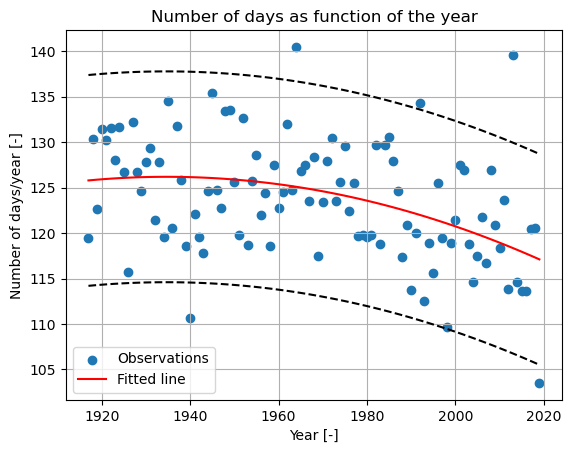

In [20]:
k = conf_int(data[:,1], fitted_parabola, 0.05)
ci_low_2 = fitted_parabola - k
ci_up_2 = fitted_parabola + k

#plot
plt.scatter(data[:,0], data[:,1], label = 'Observations')
plt.plot(data[:,0], fitted_parabola, color='r', label='Fitted line')
plt.plot(data[:,0], ci_low_2, '--k')
plt.plot(data[:,0], ci_up_2, '--k')
plt.ylabel('Number of days/year [-]')
plt.xlabel('Year [-]')
plt.grid()
plt.legend()
plt.title('Number of days as function of the year')

And finally compute the GOF metrics.

In [21]:
RMSE_parabola = RMSE(data[:,1], fitted_parabola)
R2_parabola = 1-((data[:,1]-fitted_parabola)**2).mean()/(data[:,1].var())
print(f'Coefficient of determination = {R2_parabola:.3f}')
rbias_parabola = rbias(data[:,1], fitted_parabola)

RMSE = 5.918
Coefficient of determination = 0.175
rbias = 0.002


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5.1:</b>   
    Based on the previous plot and the computed GOF metrics, is the quadratic model better than the linear one?
<ol>
</ol>
</p>
</div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.